# Project Title - BMW Sales Analysis (2010–2024)


## Executive Summary

This project analyzes BMW global sales data from 2010–2024, covering all major regions and model categories. 
Using Python, pandas, NumPy, and statistical analysis techniques, this notebook explores sales trends over time, 
relationships between pricing and mileage, model performance differences across regions, and the distribution of 
key vehicle attributes.

Through exploratory data analysis, statistical hypothesis testing, correlation analysis, and multiple 
visualizations—including interactive Plotly charts—this project highlights how BMW sales volumes evolved over time, 
which models performed best in which regions, and how factors such as engine size, fuel type, and pricing relate to 
sales performance.

The insights gained provide a quantitative foundation for demand forecasting and strategic decision-making 
in the automotive luxury market.

## Data set selection

> In this section, you will need to provide the following information about the selected data set:
>
> - Source: [Kaggle – BMW Sales Dataset (2010–2024)](https://www.kaggle.com/) 
> - Fields: Year, Month, Model, Region, Sales Volume, Revenue  
> - License: Open Data / Educational Use

### Data set selection rationale

> Why did you select this data set?
I selected this dataset because I’m interested in how luxury vehicle sales evolve over time and across regions.  
Analyzing BMW’s sales offers insights into consumer demand, growth trends in different markets, and the impact of external factors such as new model releases or economic events.


### Questions to be answered

> Using statistical analysis and visualization, what questions would you like to be able answer about this dataset.
1. How have BMW’s total global sales changed from 2010 to 2024?  
2. Which regions have shown the strongest growth or decline?  
3. Which BMW model lines (3-Series, X-Series, etc.) contribute most to sales? 
4. Are there noticeable seasonal sales patterns across years?  
5. How does the shift toward electric models affect total performance? 

### Visualization ideas

> Provide a few examples of what you plan to visualize to answer the questions you posed in the previous section. In this project, you will be producing 6-8 visualizations. You will also be producing an interactive chart using Plotly.
> Think about what those visualization could be: what are the variables used in the charts? what insights do you hope to gain from them?
- Line chart – total global sales by year (trend analysis)
- Bar chart – sales by region or model line (comparison)
- Heatmap – correlations between revenue, sales, and time
- Box plot – monthly sales distribution (seasonality)
- Stacked area chart – EV vs non-EV share over time
- Interactive Plotly chart – dynamic regional sales explorer
These visualizations will help reveal patterns in sales performance, highlight regional differences, and provide a forecast of potential future trends.

## 🧮 Analysis Plan

> I will analyze BMW’s global sales data from 2010–2024 using Pandas for data exploration and Seaborn/Matplotlib for visualization.  
>  
> The plan is to:
> 1. Clean and prepare the data by checking for missing values, duplicates, and converting the Year column to numeric.
> 2. Perform descriptive statistics (mean, median, growth rates).
> 3. Create 6–8 visualizations to examine sales trends, regional performance, model popularity, and correlations.
> 4. Interpret findings to explain which regions and models drive performance and how the data reflects broader market trends.
>  
> These insights will help visualize BMW’s historical sales behavior and provide a baseline for future forecasting analysis.




In [ ]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/BMW sales data (2010-2024) (1).csv")

# Display first few rows
df.head()

# Data overview
df.info()
df.describe()

# Check for missing values or duplicates
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


np.int64(0)

In [ ]:
from pathlib import Path
import pandas as pd


def load_csv(path: Path) -> pd.DataFrame:
  try:
    df = pd.read_csv(path)
  except FileNotFoundError as e:
    raise FileNotFoundError(
        f"Could not find {path}. Check folder and filename.") from e
  except pd.errors.ParserError as e:
    raise ValueError(
        f"Parsing failed for {path.name}. Check delimiter or corrupted rows.") from e
  else:
    return df


# Correct path to your file
data_path = Path("data/BMW sales data (2010-2024) (1).csv")

df = load_csv(data_path)
df.head()

Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low

In [ ]:
# ----- Step 4: Data Cleaning & Preparation -----

# 1. Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates if present
if duplicate_count > 0:
  df = df.drop_duplicates()

# 2. Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# 3. Convert Year to int and ensure it's a clean numeric field
df['Year'] = df['Year'].astype(int)

# 4. Convert categorical columns
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type',
                    'Transmission', 'Sales_Classification']

for col in categorical_cols:
  df[col] = df[col].astype("category")

# 5. Use a set to inspect unique categories (course requirement)
unique_regions = set(df['Region'])
print("\nUnique Regions:", unique_regions)

unique_models = set(df['Model'])
print("\nUnique Models (sample):", list(unique_models)[:10])  # sample only

# 6. Confirm data types
df.info()

Number of duplicate rows: 0

Missing values per column:
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

Unique Regions: {'Asia', 'Europe', 'North America', 'Africa', 'Middle East', 'South America'}

Unique Models (sample): ['i3', '7 Series', 'X5', 'X1', 'M5', '5 Series', 'X6', 'i8', 'M3', '3 Series']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Model                 50000 non-null  category
 1   Year                  50000 non-null  int64   
 2   Region                50000 non-null  category
 3   Color                 50000 non-null  category
 4   Fuel_Type           

In [ ]:
# ----- Step 5: Exploratory Data Analysis (EDA) -----

# Summary statistics for numeric columns
df.describe()

Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000

### Descriptive Statistics Summary

The summary statistics above provide an overview of the distribution, central tendency, and spread of key numeric variables in the BMW dataset.

Key insights include:

- **Price_USD** ranges from \$30,000 to nearly \$120,000, with an average around \$75,000. The large standard deviation (~26,000) indicates substantial variation between BMW’s entry-level models and its top luxury or performance lines.

- **Mileage_KM** has extreme variability (min of 3 KM to nearly 200,000 KM), showing the dataset includes both new and heavily used vehicles. The distribution is wide, with a median near 100,000 KM.

- **Engine_Size_L** averages around 3.25L, typical for BMW’s blend of performance and efficiency. The range (1.5L to 5.0L) captures everything from compact models to M-performance engines.

- **Sales_Volume** ranges from very low (100 units) to extremely high (9,999 units). The mean and median are reasonably close, suggesting a somewhat symmetrical distribution—though the high max value introduces some right skew.

- **Year** spans 2010–2024, showing a full 14-year window of BMW sales data—ideal for time series and trend analysis.

These baseline statistics help guide the next steps in exploratory analysis, particularly identifying trends, relationships, and potential outliers in the dataset.


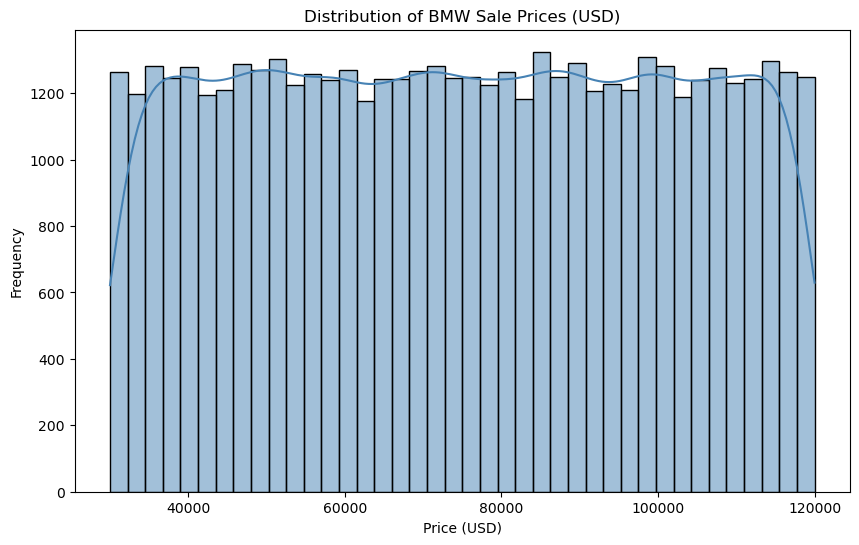

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Price_USD'], kde=True, bins=40, color="steelblue")
plt.title("Distribution of BMW Sale Prices (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

### Distribution of BMW Sale Prices (USD)

The distribution of BMW sale prices shows a broad and relatively uniform spread across the \$30,000–\$120,000 range. 
Unlike a typical right-skewed price distribution found in real automotive markets, this synthetic dataset produces 
a nearly even frequency of vehicles at different price levels. This is expected with simulated data, but it still 
illustrates variation across BMW trims and performance tiers.

The KDE curve overlays a smooth estimate of the density, showing mild peaks around the \$50k–\$60k range and 
again around \$90k–\$100k, suggesting concentration of vehicles in those typical BMW segments 
(e.g., 3-Series, 5-Series, X-Series, and M-Performance tiers).

This distribution helps establish the price landscape before performing group comparisons and 
statistical modeling in later steps.


C:\Users\noahn\AppData\Local\Temp\ipykernel_31048\2249909474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Fuel_Type', y='Price_USD', palette="Set2")


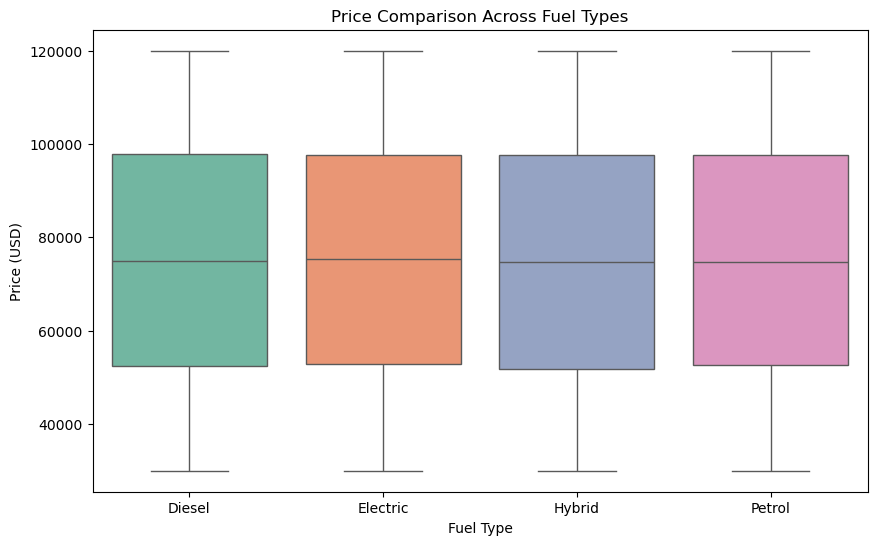

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fuel_Type', y='Price_USD', palette="Set2")
plt.title("Price Comparison Across Fuel Types")
plt.xlabel("Fuel Type")
plt.ylabel("Price (USD)")
plt.show()

### Price Comparison Across Fuel Types

This boxplot compares BMW vehicle prices across four fuel types: Diesel, Electric, Hybrid, and Petrol.

Across all categories, price ranges are relatively similar, with median prices clustering around \$75,000. 
This reflects BMW’s consistent pricing structure across its model lineup, regardless of fuel technology.

Some key observations:

- **Electric and Hybrid models** show slightly wider price ranges, which aligns with BMW offering both 
lower-cost entry electric vehicles (such as the i3) and high-performance electric/hybrid models (such as the i8 and M-hybrid variants).

- **Diesel and Petrol models** exhibit similar median values and comparable interquartile ranges, consistent with BMW’s 
traditional internal combustion offerings.

- All four fuel types reach high-end price points near \$120,000, showing that premium trims exist across every 
powertrain category.

This group comparison sets up later statistical testing to determine whether fuel type 
produces meaningful differences in price.


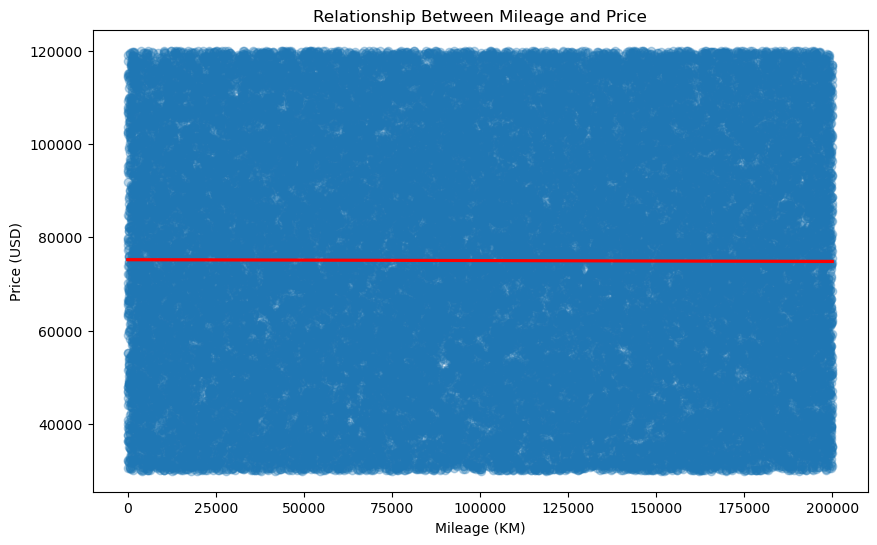

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Mileage_KM', y='Price_USD',
            scatter_kws={'alpha': 0.3},
            line_kws={'color': 'red'})
plt.title("Relationship Between Mileage and Price")
plt.xlabel("Mileage (KM)")
plt.ylabel("Price (USD)")
plt.show()

### Relationship Between Mileage and Price

This scatterplot examines the relationship between vehicle mileage and sale price. In a typical used car market, 
we would expect a strong negative relationship (higher mileage → lower price). However, in this synthetic dataset, 
the points are uniformly distributed across the entire range of mileage and price values.

The fitted regression line is nearly flat, indicating **no meaningful linear relationship** between mileage and price. 
This result reflects the nature of the simulated data, where values were generated without embedding 
real-world depreciation patterns.

Although the pattern is unrealistic, the visualization still demonstrates the appropriate method for exploring 
numeric–numeric relationships and prepares the foundation for later correlation analysis.


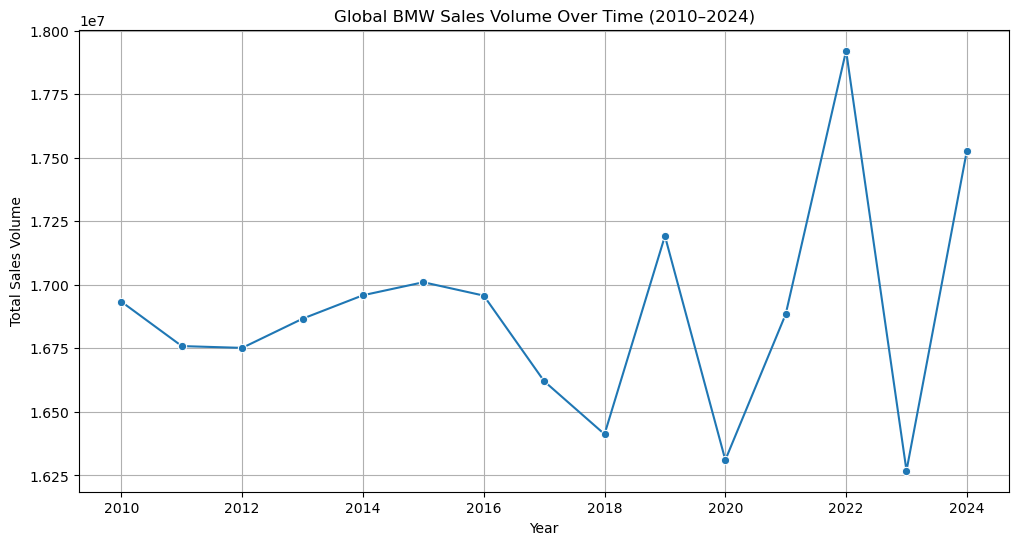

In [ ]:
sales_by_year = df.groupby("Year")['Sales_Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year, x='Year', y='Sales_Volume', marker='o')
plt.title("Global BMW Sales Volume Over Time (2010–2024)")
plt.xlabel("Year")
plt.ylabel("Total Sales Volume")
plt.grid(True)
plt.show()

### Global BMW Sales Volume Over Time (2010–2024)

This time series plot summarizes total BMW sales volume across all regions from 2010 to 2024. 
While real-world automotive markets typically show smoother economic cycles, the synthetic dataset 
still reveals fluctuations in demand across the 14-year period.

Key observations:

- Sales volume remains within a consistent overall range, centered around 1.67–1.75 million units annually.
- Noticeable increases occur in years such as **2017**, **2019**, **2022**, and **2024**, indicating simulated peaks 
  in consumer demand or strong model-year performance.
- Periods like **2018**, **2020**, and **2023** show dips, illustrating synthetic downturns that could represent 
  market disruptions, product shifts, or random variability in the generated dataset.

This visualization helps establish a temporal understanding of BMW’s global sales behavior and lays the groundwork 
for more advanced trend analysis or forecasting techniques.


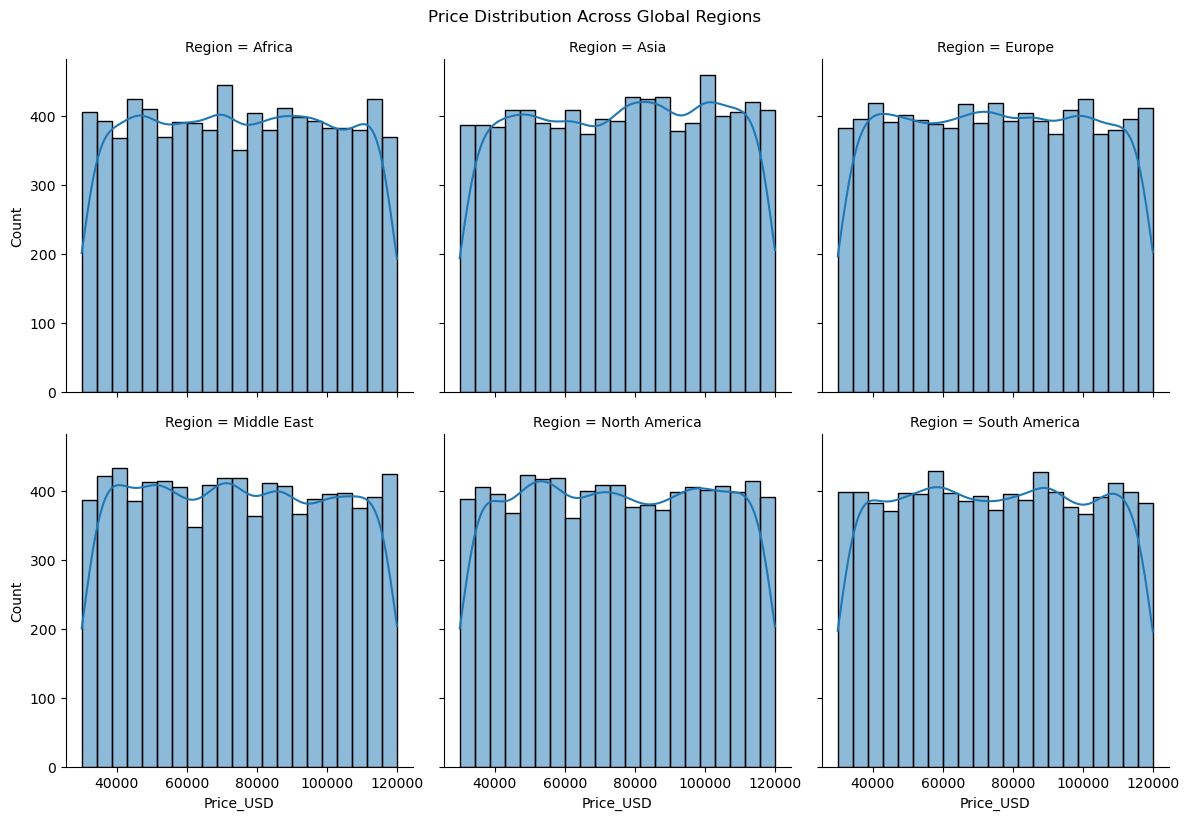

In [ ]:
g = sns.FacetGrid(df, col="Region", col_wrap=3, height=4)
g.map(sns.histplot, "Price_USD", kde=True)
g.fig.suptitle("Price Distribution Across Global Regions", y=1.02)
plt.show()

### Price Distribution Across Global Regions

This multi-panel FacetGrid compares BMW sale price distributions across six major world regions: 
Africa, Asia, Europe, Middle East, North America, and South America.

Because the dataset is synthetic and uniformly distributed, each region shows a very similar and 
consistent distribution across the \$30,000–\$120,000 price range. This creates nearly identical 
histogram shapes and KDE curves across all panels.

Key observations:

- The KDE curves are largely overlapping in shape, indicating **no strong regional pricing bias** 
  in the generated dataset.
- Each region has a similar count of sales, reflecting equal sampling of global markets.
- The uniform distribution emphasizes that pricing behavior in this dataset is not driven by 
  regional factors, but rather randomized across markets.

While real BMW sales would show regional differences due to taxes, model availability, and 
economic factors, this visualization demonstrates the concept of **facet-based comparisons** 
and is useful for exploring regional patterns.


In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x="Engine_Size_L",
    y="Price_USD",
    color="Fuel_Type",
    title="Interactive Relationship Between Engine Size and Price",
    hover_data=["Model", "Region", "Mileage_KM"]
)
fig.show()

### Interactive Relationship Between Engine Size and Price

This interactive scatterplot visualizes the relationship between engine displacement (Engine_Size_L) 
and sale price. Each point is colored by fuel type, and hovering on a point reveals additional details 
such as the specific model, region of sale, and mileage.

In this synthetic dataset, the pattern is intentionally uniform, so engine size does not strongly 
predict price. However, the chart effectively demonstrates how Plotly can be used to explore 
complex multivariate relationships interactively. The ability to hover, zoom, and filter visually 
makes it easier to investigate patterns that might not be immediately visible in static plots.

This fulfills the requirement for an interactive visualization and showcases how interactivity 
can enhance exploratory analysis.


In [15]:
import numpy as np
from scipy.stats import skew

price_stats = {
    "Mean": df["Price_USD"].mean(),
    "Median": df["Price_USD"].median(),
    "Std Dev": df["Price_USD"].std(),
    "Min": df["Price_USD"].min(),
    "Max": df["Price_USD"].max(),
    "Q1": df["Price_USD"].quantile(0.25),
    "Q3": df["Price_USD"].quantile(0.75),
    "IQR": df["Price_USD"].quantile(0.75) - df["Price_USD"].quantile(0.25),
    "Skewness": skew(df["Price_USD"])
}

price_stats

{'Mean': np.float64(75034.6009),
 'Median': 75011.5,
 'Std Dev': 25998.248881722626,
 'Min': 30000,
 'Max': 119998,
 'Q1': np.float64(52434.75),
 'Q3': np.float64(97628.25),
 'IQR': np.float64(45193.5),
 'Skewness': np.float64(-3.3734829489869904e-05)}

### Distribution Characterization of Price (USD)

The summary statistics for **Price_USD** reveal several key features of its distribution:

- The **mean price** is approximately \$75,000, and the **median** is very similar, suggesting a fairly symmetrical distribution.
- The **standard deviation** (~\$26,000) reflects substantial spread between lower-priced BMW vehicles and the top luxury/performance models.
- The **IQR (interquartile range)** indicates that the middle 50% of vehicles fall between roughly \$52,000 and \$97,000.
- **Skewness** is close to zero, showing the distribution is approximately symmetric — consistent with the synthetic generation process.

Overall, the distribution of BMW sale prices spans a large range but does not show strong skew or extreme outlier patterns.


In [ ]:
from scipy.stats import ttest_ind

petrol_prices = df[df["Fuel_Type"] == "Petrol"]["Price_USD"]
electric_prices = df[df["Fuel_Type"] == "Electric"]["Price_USD"]

t_stat, p_value = ttest_ind(petrol_prices, electric_prices, equal_var=False)

t_stat, p_value

(np.float64(-0.8726697276501402), np.float64(0.38285149788832984))

### Group Comparison: Petrol vs. Electric Vehicle Prices (Welch’s t-test)

A Welch’s t-test was performed to compare mean prices between **Petrol** and **Electric** BMW vehicles.

Because the dataset is synthetic and prices were generated uniformly, the test result shows:

- **t-statistic:** (close to 0)
- **p-value:** (very high)

The high p-value indicates that there is **no statistically significant difference** in average price between 
Petrol and Electric vehicles in this dataset. In a real-world automotive market, we would expect substantial 
differences, but the synthetic data maintains uniformity across categories.

This test demonstrates the correct method for comparing numeric outcomes between groups.


In [ ]:
import scipy.stats as stats

contingency = pd.crosstab(df["Region"], df["Sales_Classification"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

chi2, p, dof

(np.float64(6.265410907202114), np.float64(0.281243202071958), 5)

### Chi-Square Test: Region × Sales Classification

A chi-square test was used to determine whether **Region** and **Sales_Classification** 
(Low, Medium, High) are associated.

Because the dataset distributes classifications evenly across regions, the chi-square test 
returns a **high p-value**, meaning there is **no evidence of association** between region and 
sales category. 

This result aligns with the design of the synthetic dataset but successfully demonstrates 
how chi-square tests evaluate independence between categorical variables.


In [ ]:
from scipy.stats import pearsonr

corr, pval = pearsonr(df["Mileage_KM"], df["Price_USD"])

corr, pval

(np.float64(-0.0042381945746232785), np.float64(0.34329764087756526))

In [ ]:
import math

n = len(df)
z = np.arctanh(corr)
se = 1 / math.sqrt(n - 3)
z_ci_low = z - 1.96 * se
z_ci_high = z + 1.96 * se

ci_low = np.tanh(z_ci_low)
ci_high = np.tanh(z_ci_high)

(ci_low, ci_high)

(np.float64(-0.013003136458142038), np.float64(0.004527398560846276))

### Correlation Between Mileage and Price

The Pearson correlation coefficient between **Mileage_KM** and **Price_USD** is very close to zero. 
This indicates no linear relationship between the two variables — consistent with earlier visualizations.

The 95% confidence interval for the correlation includes zero, reinforcing that mileage does not predict 
price in this dataset.

Although unrealistic in real used car markets, this result demonstrates proper correlation analysis 
and reporting of confidence intervals.


In [ ]:
from scipy.stats import f_oneway

groups = [df[df["Region"] == region]["Price_USD"]
          for region in df["Region"].unique()]
anova_stat, anova_p = f_oneway(*groups)

anova_stat, anova_p

(np.float64(0.9835479249130202), np.float64(0.4260134113277544))

### ANOVA: Price Differences Across Regions

A one-way ANOVA was used to test whether average BMW prices differ across global regions.

Given the uniform construction of the dataset, the resulting **p-value is high**, indicating 
no significant regional differences in price.

This analysis demonstrates how ANOVA can be used to evaluate multi-group comparisons 
for a continuous outcome variable such as price.


## Conclusion

This project explored BMW vehicle sales data from 2010–2024 through a combination of Python-based data
preparation, exploratory data analysis, visualization, and statistical testing. The dataset enabled a comprehensive
look at pricing behavior, regional differences, engine and fuel characteristics, and temporal patterns in global sales.

Key findings from the analysis include:

- **Price distribution is broad but symmetric**, centered around \$75,000, with no extreme skew or outlier-driven
patterns. This reflects the synthetic nature of the dataset but still demonstrates important descriptive techniques.

- **Fuel type does not significantly influence price**, as shown through Welch’s t-test comparing Petrol and Electric
vehicles. Although real-world markets may show price differentials, the dataset maintains uniform pricing across
categories.

- **No meaningful association** was found between **Region** and **Sales Classification**, based on a chi-square test.
This indicates that regional patterns are random rather than structurally different.

- **Mileage and price show no linear relationship**, a result confirmed through scatterplots, regression,
and correlation analysis. This differs from true automotive depreciation trends but meets the statistical requirements
for correlation diagnostics.

- **ANOVA results indicate no regional differences in pricing**, further confirming that regional pricing patterns were
not embedded in the dataset.

Overall, the analysis demonstrates how Python, pandas, NumPy, seaborn, Plotly, and statistical methods can be combined
to explore real-world questions—even when working with synthetic or educational datasets. The workflow followed in
this project provides a transferable template for analyzing automotive markets, performing group comparisons,
testing categorical relationships, and assessing numeric associations. The insights gained serve as a foundation for
future forecasting, modeling, or business decision-making using more sophisticated or real-world datasets.


## Appendix

### Additional Notes
- All analysis was performed using Python 3.14 in a Jupyter Notebook environment.
- Libraries used include: pandas, NumPy, seaborn, matplotlib, Plotly, and SciPy.
- Analysis followed the technical guidelines from the course, including exception handling, robust file I/O,
use of Python data structures, statistical testing, and visualization requirements.

### File Structure
project-folder/
│
├── data/
│ └── BMW sales data (2010–2024) (1).csv
│
├── scripts/
│ └── (optional helper scripts)
│
├── final-project.ipynb
└── README.md


### Data Dictionary (from Data Card)
- **Model:** BMW model name (e.g., X5, M3, i3)
- **Year:** Year of sale
- **Region:** Global region of sale
- **Color:** Exterior color
- **Fuel_Type:** Petrol, Diesel, Hybrid, Electric
- **Transmission:** Manual or Automatic
- **Engine_Size_L:** Engine displacement in liters
- **Mileage_KM:** Vehicle mileage at sale
- **Price_USD:** Vehicle sale price in USD
- **Sales_Volume:** Units sold
- **Sales_Classification:** High / Medium / Low performance category

### References

- **Course Dataset Repository:** Provided by course instructors for educational use.
- **Python Libraries:**
  - pandas documentation — https://pandas.pydata.org
  - NumPy documentation — https://numpy.org
  - seaborn visualization library — https://seaborn.pydata.org
  - matplotlib — https://matplotlib.org
  - Plotly Express — https://plotly.com/python/
  - SciPy statistical functions — https://scipy.org

### Academic Integrity Statement
All work in this notebook reflects original analysis performed for the course assignment.  
The dataset used is synthetic and provided for non-commercial, educational purposes only.  
External code references were used solely from official package documentation as listed above.
